In [1]:
import textacy
import texthero as hero
import string
import nltk

In [2]:
from textblob import TextBlob
from textblob import Word
from textacy import preprocessing, extract
from texthero import preprocessing

In [3]:
from nltk import word_tokenize
from nltk.corpus import stopwords
from nltk.tokenize import RegexpTokenizer
from nltk.stem import WordNetLemmatizer
from nltk.stem.porter import PorterStemmer

In [4]:
import matplotlib.pyplot as plt

In [5]:
import csv
import numpy as np
import os
import pandas as pd
import seaborn as sns

# LOCAL_REPOSITORY_LOCATION = os.environ.get('LOCAL_REPOSITORY_LOCATION')

# os.chdir(r'C:\Users\baxna\Documents\LOCAL_REPOSITORY_LOCATION\DAPT\Text_Mining')

# print(os.getcwdb())

In [6]:
# read in the eval data
df1 = pd.read_csv(r'eval_data_dapt.csv', encoding = 'utf-8', dtype = str)

# read in the lookup values
df2 = pd.read_excel(r'competency_definitions.xlsx', sheet_name = 0)

In [7]:
df1.columns

Index(['eval_id', 'student_id', 'gender', 'course', 'preceptor', 'epa_number',
       'rating_score', 'rating_label', 'comments'],
      dtype='object')

In [8]:
df2.columns

Index(['epa_number', 'display_label'], dtype='object')

In [9]:
df3 = pd.merge(df1, df2, on = 'epa_number', how = 'left')

In [10]:
df3 = df3[['eval_id', 'student_id', 'gender', 'course', 'preceptor', 'epa_number', 'display_label', 'rating_score', 'rating_label', 'comments']]

In [12]:
df3.shape

(1240, 10)

In [265]:
df3.isnull().sum().sum()

0

In [266]:
custom_pipeline = [preprocessing.lowercase,
                   preprocessing.remove_whitespace,
                   preprocessing.remove_stopwords,
                   preprocessing.remove_diacritics,
                   preprocessing.remove_punctuation,
                   preprocessing.remove_digits,
                   preprocessing.drop_no_content]

In [267]:
df3['comments'] = hero.clean(df3['comments'], custom_pipeline)

In [268]:
df3.head(10)

,eval_id,student_id,gender,course,preceptor,epa_number,display_label,rating_score,rating_label,comments
0,55339,855,M,Pediatrics,Attending,EPA 1,Gather a History and Perform a Physical Examin...,3,I had to prompt them from time to time,work interview structure keep consistent ...
1,55453,855,M,Pediatrics,Attending,EPA 6,Provide an Oral Presentation of a Clinical Enc...,3,I had to prompt them from time to time,develop ed focused presentation skills presen...
2,56658,855,M,Pediatrics,Attending,EPA 2,Prioritize a Differential Diagnosis Following ...,4,I needed to be available just in case,watch many physical exams possible
3,57949,855,M,Pediatrics,Attending,EPA 3,Recommend and Interpret Common Diagnostic and ...,3,I had to prompt them from time to time,work methodical collecting information p...
4,62690,855,M,Pediatrics,Attending,EPA 5,Document a Clinical Encounter in the Patient R...,3,I had to prompt them from time to time,well reorganizing assessment problem plan...
5,62692,855,M,Pediatrics,Attending,EPA 9,Collaborate as a Member of an Interprofessiona...,4,I needed to be available just in case,think great get involved physical therap...
6,63905,855,M,Obstetrics & Gynecology,Attending,EPA 9,Collaborate as a Member of an Interprofessiona...,3,I had to prompt them from time to time,present scrubbed engaged hysterectomy ask...
7,64208,855,M,Obstetrics & Gynecology,Resident,EPA 6,Provide an Oral Presentation of a Clinical Enc...,3,I had to prompt them from time to time,needs work physical exam skills organizing ...
8,65824,855,M,Obstetrics & Gynecology,Attending,EPA 6,Provide an Oral Presentation of a Clinical Enc...,3,I had to prompt them from time to time,presentation case based teaching conferen...
9,68077,855,M,Obstetrics & Gynecology,Resident,EPA 7,Form Clinical Questions and Retrieve Evidence ...,3,I had to prompt them from time to time,fine new third year


In [270]:
df3.head()

,eval_id,student_id,gender,course,preceptor,epa_number,display_label,rating_score,rating_label,comments,count
0,55339,855,M,Pediatrics,Attending,EPA 1,Gather a History and Perform a Physical Examin...,3,I had to prompt them from time to time,work interview structure keep consistent ...,19.0
1,55453,855,M,Pediatrics,Attending,EPA 6,Provide an Oral Presentation of a Clinical Enc...,3,I had to prompt them from time to time,develop ed focused presentation skills presen...,10.0
2,56658,855,M,Pediatrics,Attending,EPA 2,Prioritize a Differential Diagnosis Following ...,4,I needed to be available just in case,watch many physical exams possible,5.0
3,57949,855,M,Pediatrics,Attending,EPA 3,Recommend and Interpret Common Diagnostic and ...,3,I had to prompt them from time to time,work methodical collecting information p...,14.0
4,62690,855,M,Pediatrics,Attending,EPA 5,Document a Clinical Encounter in the Patient R...,3,I had to prompt them from time to time,well reorganizing assessment problem plan...,11.0


In [271]:
df3.groupby('rating_score')['count'].mean()


rating_score
1    14.500000
2    13.851852
3    15.821277
4    10.463339
5     7.303951
Name: count, dtype: float64

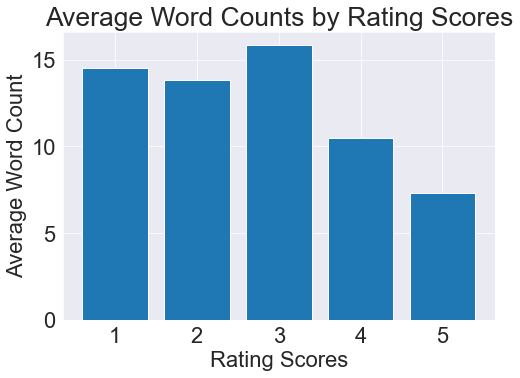

In [272]:
import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
rating_scores = ['1', '2', '3', '4', '5']
Average_Word_Counts = [14.50,13.85,15.82,10.46,7.30]
ax.bar(rating_scores,Average_Word_Counts)
ax.set_ylabel('Average Word Count')
ax.set_xlabel('Rating Scores')
ax.set_title('Average Word Counts by Rating Scores')
plt.show()

In [273]:
df3.groupby('rating_score')['count'].min()

rating_score
1    5.0
2    3.0
3    1.0
4    1.0
5    1.0
Name: count, dtype: float64

In [274]:
df3.groupby('rating_score')['count'].max()

rating_score
1     25.0
2     33.0
3    166.0
4    147.0
5     64.0
Name: count, dtype: float64

In [275]:
# Average number of words per rating score by preceptor
df3.groupby(['preceptor', 'rating_score'])['count'].mean()

preceptor  rating_score
Attending  1                9.000000
           2               20.375000
           3               16.858156
           4               12.139601
           5               10.054348
Other      3                3.285714
           4                3.246914
           5                3.639175
Resident   1               20.000000
           2               11.105263
           3               16.187500
           4               10.444976
           5                8.035714
Name: count, dtype: float64

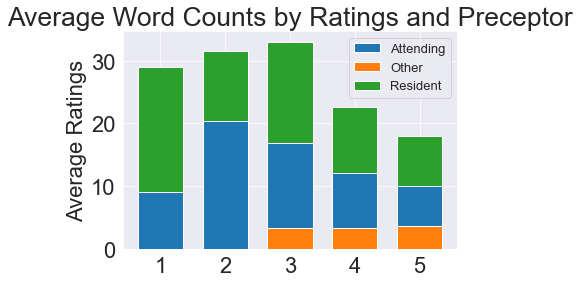

In [297]:
labels = ['1', '2', '3', '4', '5']
attending_means = [9.00, 20.38, 16.86, 12.14, 10.05]
other_means = [0, 0, 3.28, 3.25, 3.64]
resident_means = [20.00, 11.11, 16.19, 10.44, 8.03]
width = 0.7      # adjusts the width of the bars

fig, ax = plt.subplots()

ax.bar(labels, attending_means, width, label='Attending')
ax.bar(labels, other_means, width, label='Other')
ax.bar(labels, resident_means, width, bottom=attending_means, label='Resident')


ax.set_ylabel('Average Ratings')
ax.set_title('Average Word Counts by Ratings and Preceptor')
ax.legend()
plt.legend(prop={"size":13})

plt.show()

In [277]:
df3.groupby(['course', 'rating_score'])['count'].mean()

course                   rating_score
Ambulatory               3               10.155556
                         4                9.476190
                         5               11.108696
Family Medicine          1                5.000000
                         3                5.090909
                         4                3.868421
                         5                3.438202
Internal Medicine        2               14.416667
                         3               22.420000
                         4               17.195312
                         5                9.837209
Neurology                1               16.000000
                         2               13.666667
                         3               17.000000
                         4                8.170732
                         5                8.000000
Obstetrics & Gynecology  1                6.000000
                         2               14.000000
                         3               12.

In [278]:
# Average number of words per rating score by course

#df4 = df3.groupby(['course', 'rating_score'])['count'].mean()

In [279]:
#df5 = pd.DataFrame(df4)
#df5.reset_index(inplace = True)

In [280]:
#df5.head(10)

,course,rating_score,count
0,Ambulatory,3,10.155556
1,Ambulatory,4,9.476190
2,Ambulatory,5,11.108696
3,Family Medicine,1,5.000000
4,Family Medicine,3,5.090909
5,Family Medicine,4,3.868421
6,Family Medicine,5,3.438202
7,Internal Medicine,2,14.416667
8,Internal Medicine,3,22.420000
9,Internal Medicine,4,17.195312


In [281]:
#df5.dtypes

course           object
rating_score     object
count           float64
dtype: object

In [282]:
#df5["course_rating"] = df5["course"] + df5["rating_score"]

In [283]:
#df5.head()

,course,rating_score,count,course_rating
0,Ambulatory,3,10.155556,Ambulatory3
1,Ambulatory,4,9.476190,Ambulatory4
2,Ambulatory,5,11.108696,Ambulatory5
3,Family Medicine,1,5.000000,Family Medicine1
4,Family Medicine,3,5.090909,Family Medicine3


In [284]:
agg_df3 = df3.groupby(['rating_score', 'course'])['count'].mean().unstack().fillna(0)
agg_df3

course,Ambulatory,Family Medicine,Internal Medicine,Neurology,Obstetrics & Gynecology,Pediatrics,Psychiatry,Surgery
rating_score,,,,,,,,
1,0.000000,5.000000,0.000000,16.000000,6.000000,0.000000,0.000000,20.000000
2,0.000000,0.000000,14.416667,13.666667,14.000000,16.500000,13.200000,11.750000
3,10.155556,5.090909,22.420000,17.000000,12.960000,20.593750,16.107143,13.500000
4,9.476190,3.868421,17.195312,8.170732,9.813953,10.404255,10.166667,8.701493
5,11.108696,3.438202,9.837209,8.000000,11.185185,10.000000,7.428571,4.156250


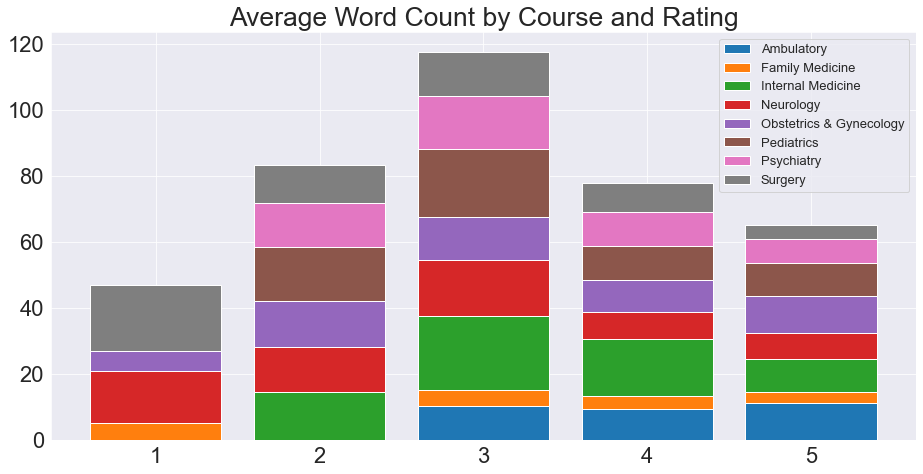

In [291]:
from matplotlib import pyplot as plt

fig, ax = plt.subplots()

# Initialize the bottom at zero for the first set of bars.
bottom = np.zeros(len(agg_df3))

# Plot each layer of the bar, adding each bar to the "bottom" so
# the next bar starts higher.
for i, col in enumerate(agg_df3.columns):
  ax.bar(agg_df3.index, agg_df3[col], bottom=bottom, label=col)
  bottom += np.array(agg_df3[col])

ax.set_title('Average Word Count by Course and Rating')
ax.legend()
plt.legend(prop={"size":13})
fig.set_size_inches(15.5, 7.5)
